Instala o actualiza la librería unidecode y la librería oficial de Kaggle en el entorno de Python usando pip.

In [ ]:
!pip install --upgrade kaggle
!pip install unidecode

Se instalan las librerias necesarias.

In [ ]:
import os
import pandas as pd
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from unidecode import unidecode

Define las variables de entorno KAGGLE_USERNAME y KAGGLE_KEY con tus credenciales de Kaggle para autenticarse

In [ ]:
os.environ['KAGGLE_USERNAME'] = 'felipesnchezlondoo'
os.environ['KAGGLE_KEY']      = 'a15eca55f12e308debc9d91ecdbbe5a2'

Crea la carpeta /content/data

In [ ]:
os.makedirs('/content/data', exist_ok=True)

Descarga los archivos de la competencia en /content/data en un archivo comprimido tipo ZIP

In [ ]:
!kaggle competitions download \
    -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia \
    -p /content/data

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 625MB/s]


Descomprime todos los archivos ZIP dentro de /content/data

In [ ]:
!unzip -q "/content/data/udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip" -d /content/data

Carga los CSV en DataFrames de pandas

In [ ]:
df_train = pd.read_csv('/content/data/train.csv')
df_test  = pd.read_csv('/content/data/test.csv')

Devuelve dos tuplas con (número de filas, número de columnas) para df_train y df_test

In [ ]:
lentr = len(df_train)
df_train.shape, df_test.shape

((692500, 21), (296786, 20))



Se muestran los primeros elementos del archivo de entrenamiento.


Se elimina la columna "ESTU_PRIVADO_LIBERTAD" del archivo df_train

In [ ]:
del(df_train["ESTU_PRIVADO_LIBERTAD"])

In [ ]:
del(df_test["ESTU_PRIVADO_LIBERTAD"])

Muestra las primeras 5 filas del archvio df_train y df_test

In [ ]:
df_train.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [ ]:
df_test.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,coef_1,coef_2,coef_3,coef_4
0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Si,No,N,Si,Si,Si,Primaria completa,0.328,0.219,0.317,0.247
1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Técnica o tecnológica completa,0.227,0.283,0.296,0.324
2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.285,0.228,0.294,0.247
3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Si,No,N,No,No,No,Primaria incompleta,0.160,0.408,0.217,0.294
4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.209,0.283,0.306,0.286


Valores NaN que están presentes en cada columna

In [ ]:
import numpy as np
for i in df_train.columns:
    print ("%20s"%i, np.sum(df_train[i].isna()))

                  ID 0
             PERIODO 0
 ESTU_PRGM_ACADEMICO 0
ESTU_PRGM_DEPARTAMENTO 0
ESTU_VALORMATRICULAUNIVERSIDAD 6287
ESTU_HORASSEMANATRABAJA 30857
FAMI_ESTRATOVIVIENDA 32137
  FAMI_TIENEINTERNET 26629
 FAMI_EDUCACIONPADRE 23178
  FAMI_TIENELAVADORA 39773
 FAMI_TIENEAUTOMOVIL 43623
ESTU_PAGOMATRICULAPROPIO 6498
FAMI_TIENECOMPUTADOR 38103
FAMI_TIENEINTERNET.1 26629
 FAMI_EDUCACIONMADRE 23664
  RENDIMIENTO_GLOBAL 0
              coef_1 0
              coef_2 0
              coef_3 0
              coef_4 0


Creamos una función para limpiar los datos.

In [ ]:
def clean_pro(df_train):
  df_train["ESTU_VALORMATRICULAUNIVERSIDAD"] = df_train.ESTU_VALORMATRICULAUNIVERSIDAD.fillna("Menos de 500 mil")
  df_train["FAMI_ESTRATOVIVIENDA"] = df_train.FAMI_ESTRATOVIVIENDA.fillna("Estrato 3")
  df_train["FAMI_TIENEINTERNET"] = df_train.FAMI_TIENEINTERNET.fillna("No")
  df_train["FAMI_EDUCACIONPADRE"] = df_train.FAMI_EDUCACIONPADRE.fillna("No sabe")
  df_train["FAMI_TIENELAVADORA"] = df_train.FAMI_TIENELAVADORA.fillna("Si")
  df_train["FAMI_TIENEAUTOMOVIL"] = df_train.FAMI_TIENEAUTOMOVIL.fillna("No")
  df_train["ESTU_PAGOMATRICULAPROPIO"] = df_train.ESTU_PAGOMATRICULAPROPIO.fillna("No")
  df_train["FAMI_TIENECOMPUTADOR"] = df_train.FAMI_TIENECOMPUTADOR.fillna("No")
  df_train["FAMI_EDUCACIONMADRE"] = df_train.FAMI_EDUCACIONPADRE.fillna("No sabe")
  df_train["FAMI_TIENEINTERNET.1"] = df_train.FAMI_TIENEINTERNET.fillna("No")
  df_train["ESTU_HORASSEMANATRABAJA"] = df_train.ESTU_HORASSEMANATRABAJA.fillna("Menos de 10 horas")
  df_train['ESTU_PRGM_ACADEMICO'] = df_train['ESTU_PRGM_ACADEMICO'].apply(lambda x: unidecode(x))

  return df_train

Se corrobora que no hayan datos NaN

In [ ]:
df_train.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [ ]:
import numpy as np
clean_pro(df_train)
for i in df_train.columns:
    print ("%20s"%i, np.sum(df_train[i].isna()))

                  ID 0
             PERIODO 0
 ESTU_PRGM_ACADEMICO 0
ESTU_PRGM_DEPARTAMENTO 0
ESTU_VALORMATRICULAUNIVERSIDAD 0
ESTU_HORASSEMANATRABAJA 0
FAMI_ESTRATOVIVIENDA 0
  FAMI_TIENEINTERNET 0
 FAMI_EDUCACIONPADRE 0
  FAMI_TIENELAVADORA 0
 FAMI_TIENEAUTOMOVIL 0
ESTU_PAGOMATRICULAPROPIO 0
FAMI_TIENECOMPUTADOR 0
FAMI_TIENEINTERNET.1 0
 FAMI_EDUCACIONMADRE 0
  RENDIMIENTO_GLOBAL 0
              coef_1 0
              coef_2 0
              coef_3 0
              coef_4 0


Contamos las variables que tiene la columna "Rendimiendo_Global"

In [ ]:
df_train.RENDIMIENTO_GLOBAL.value_counts()

,count
RENDIMIENTO_GLOBAL,
alto,175619
bajo,172987
medio-bajo,172275
medio-alto,171619




Tipo de dato en cada una de las columnas del archivo df_train

In [ ]:
df_train.dtypes

,0
ID,int64
PERIODO,int64
ESTU_PRGM_ACADEMICO,object
ESTU_PRGM_DEPARTAMENTO,object
ESTU_VALORMATRICULAUNIVERSIDAD,object
ESTU_HORASSEMANATRABAJA,object
FAMI_ESTRATOVIVIENDA,object
FAMI_TIENEINTERNET,object
FAMI_EDUCACIONPADRE,object
FAMI_TIENELAVADORA,object


Se convierten las columnas que tienen strings a una clasificación de números para hacer un análisis estadistico mediante una codificación con pd.factorize

In [ ]:
columns_to_convert = [
    'ESTU_PRGM_ACADEMICO','ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD',
    'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET',
    'FAMI_EDUCACIONPADRE', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL',
    'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR',
    'FAMI_TIENEINTERNET.1', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL'
]

value_mapping = {}
for col in columns_to_convert:
    factorized_values, unique_values = pd.factorize(df_train[col])
    value_mapping[col] = dict(zip(unique_values, range(1, len(unique_values) + 1)))



Para ver el mapeo de cada columna se corre el siguiente código

In [ ]:
for col, mapping in value_mapping.items():
    print(f"Mapeo para la columna {col}:")
    for value, number in mapping.items():
        print(f"  {value}: {number}")
    print()

Mapeo para la columna ESTU_PRGM_ACADEMICO:
  ENFERMERIA: 1
  DERECHO: 2
  MERCADEO Y PUBLICIDAD: 3
  ADMINISTRACION DE EMPRESAS: 4
  PSICOLOGIA: 5
  MEDICINA VETERINARIA: 6
  INGENIERIA MECANICA: 7
  ADMINISTRACION EN SALUD OCUPACIONAL: 8
  INGENIERIA INDUSTRIAL: 9
  ADMINISTRACION FINANCIERA: 10
  HOTELERIA Y TURISMO: 11
  LICENCIATURA EN CIENCIAS SOCIALES: 12
  LICENCIATURA EN PEDAGOGIA INFANTIL: 13
  COMUNICACION SOCIAL: 14
  CIENCIA POLITICA: 15
  PROFESIONAL EN GESTION DE LA SEGURIDAD Y LA SALUD LABORAL: 16
  MAESTRO EN MUSICA: 17
  INGENIERIA MECATRONICA: 18
  TRABAJO SOCIAL: 19
  LICENCIATURA EN BIOLOGIA Y EDUCACION AMBIENTAL: 20
  INGENIERIA CIVIL: 21
  CONTADURIA PUBLICA: 22
  ADMINISTRACION EN SALUD: 23
  ESTADISTICA: 24
  LICENCIATURA EN BIOLOGIA: 25
  INGENIERIA AGROINDUSTRIAL: 26
  ZOOTECNIA: 27
  COMUNICACION AUDIOVISUAL: 28
  LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES-INGLES: 29
  COMUNICACION SOCIAL  - PERIODISMO: 30
  SEGURIDAD Y SALUD EN EL TRABAJO: 3

Se corrige el archivo CSV con la codificación realizada anteriormente

In [ ]:
for col, mapping in value_mapping.items():
    df_train[col] = df_train[col].map(mapping)

In [ ]:
df_train

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.322,0.208,0.310,0.267
1,645256,20212,2,2,2,2,1,2,2,1,2,1,1,2,2,2,0.311,0.215,0.292,0.264
2,308367,20203,3,1,2,3,1,1,3,1,2,1,2,1,3,2,0.297,0.214,0.305,0.264
3,470353,20195,4,3,3,2,2,1,4,1,2,1,1,1,4,3,0.485,0.172,0.252,0.190
4,989032,20212,5,4,2,4,1,1,5,1,1,1,1,1,5,4,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,134,16,6,5,4,1,3,1,2,2,1,1,3,1,0.237,0.271,0.271,0.311
692496,754213,20212,5,20,2,3,1,1,8,1,2,1,1,1,8,2,0.314,0.240,0.278,0.260
692497,504185,20183,8,1,5,1,1,1,3,1,2,2,1,1,3,4,0.286,0.240,0.314,0.287
692498,986620,20195,5,10,2,1,5,2,5,2,2,2,1,2,5,2,0.132,0.426,0.261,0.328


In [ ]:
df_train.dtypes

,0
ID,int64
PERIODO,int64
ESTU_PRGM_ACADEMICO,int64
ESTU_PRGM_DEPARTAMENTO,int64
ESTU_VALORMATRICULAUNIVERSIDAD,int64
ESTU_HORASSEMANATRABAJA,int64
FAMI_ESTRATOVIVIENDA,int64
FAMI_TIENEINTERNET,int64
FAMI_EDUCACIONPADRE,int64
FAMI_TIENELAVADORA,int64


Con el siguiente bloque de código podemos saber si hay datos faltantes. Para cada columna hay 692.500 datos; al correr el código se observa que no falta ningún punto de datos.

In [ ]:
df_train.notnull().count()

,0
ID,692500
PERIODO,692500
ESTU_PRGM_ACADEMICO,692500
ESTU_PRGM_DEPARTAMENTO,692500
ESTU_VALORMATRICULAUNIVERSIDAD,692500
ESTU_HORASSEMANATRABAJA,692500
FAMI_ESTRATOVIVIENDA,692500
FAMI_TIENEINTERNET,692500
FAMI_EDUCACIONPADRE,692500
FAMI_TIENELAVADORA,692500


Con el siguiente bloque de código podemos saber si hay datos faltantes. Esta función retorna el numero de elementos nulos que hay en cada columna


Corroboramos aqui que no hay elementos faltantes o elementos tipo NaN


In [ ]:
df_train.isnull().sum()

,0
ID,0
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
ESTU_VALORMATRICULAUNIVERSIDAD,0
ESTU_HORASSEMANATRABAJA,0
FAMI_ESTRATOVIVIENDA,0
FAMI_TIENEINTERNET,0
FAMI_EDUCACIONPADRE,0
FAMI_TIENELAVADORA,0


Con este bloque de código obtenemos información estadística del archivo de entrenamiento. Tenemos un dataframe con el número de muestras, el valor medio, la desviación estándar, el valor mínimo, máximo, la mediana y los valores correspondientes a los percentiles 25%, 50 y 75%.

In [ ]:
pd.set_option('display.max_columns',None)
df_train.describe()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
count,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000
mean,494606.130576,20198.366679,77.427831,6.432911,4.374227,2.959222,2.937135,1.144384,5.968038,1.129006,1.658814,1.438702,1.136939,1.144384,5.968038,2.503321,0.268629,0.259996,0.262087,0.262903
std,285585.209455,10.535037,123.815194,6.972639,1.876763,1.285135,1.648004,0.351479,2.918106,0.335207,0.474108,0.496229,0.343783,0.351479,2.918106,1.114983,0.122130,0.093480,0.058862,0.067944
min,1.000000,20183.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,247324.750000,20195.000000,5.000000,1.000000,3.000000,2.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,0.203000,0.212000,0.254000,0.255000
50%,494564.500000,20195.000000,22.000000,3.000000,5.000000,3.000000,4.000000,1.000000,6.000000,1.000000,2.000000,1.000000,1.000000,1.000000,6.000000,3.000000,0.240000,0.271000,0.276000,0.285000
75%,741782.500000,20203.000000,84.000000,11.000000,6.000000,4.000000,4.000000,1.000000,8.000000,1.000000,2.000000,2.000000,1.000000,1.000000,8.000000,3.000000,0.314000,0.309000,0.293000,0.303000
max,989286.000000,20213.000000,787.000000,31.000000,8.000000,5.000000,7.000000,2.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,12.000000,4.000000,0.657000,0.487000,0.320000,0.332000


Obtenemos el sesgo de cada una de las columnas para conocer qué tan precisos pueden ser los datos; para los valores que están más alejados de 0 deberá realizarse una corrección.

In [ ]:
df_train.skew()

,0
ID,0.000380
PERIODO,-0.186089
ESTU_PRGM_ACADEMICO,2.399776
ESTU_PRGM_DEPARTAMENTO,1.153104
ESTU_VALORMATRICULAUNIVERSIDAD,-0.105459
ESTU_HORASSEMANATRABAJA,0.067068
FAMI_ESTRATOVIVIENDA,0.008458
FAMI_TIENEINTERNET,2.023545
FAMI_EDUCACIONPADRE,0.083232
FAMI_TIENELAVADORA,2.213523


Al correr el siguiente bloque se observa que todas las clases tienen los valores de los resultados de los estudiantes que presentaron las pruebas Saber Pro.

Vale la pena recordar la codificación de los resultados:
mapeo para la columna RENDIMIENTO_GLOBAL:

  medio-alto: 1

  bajo: 2

  alto: 3

  medio-bajo: 4

In [ ]:
import plotly.express as px
fig = px.histogram(df_train,x="RENDIMIENTO_GLOBAL",color="RENDIMIENTO_GLOBAL",height=400,width=800)
fig.show()

Como antes se habían cambiado los items codificados, se vuelve a leer el archivo para no generar errores, esto con el fin de no afectar las gráficas anteriores y que el clasificador funcione de la mejor manera.

Se definen las variables x, y que serán las que utilizaremos en el clasificador.

In [ ]:
df_train1 = df_train.sample(n=100000, random_state=42)
df_train1.to_csv('df_train1.csv', index=False)

In [ ]:
x=df_train1.drop(["ID","RENDIMIENTO_GLOBAL"],axis=1)
y=df_train1['RENDIMIENTO_GLOBAL']


Se realizan diferentes modelos con las librerías previamente incluídas para conocer su exactitud, precisión, memoria y la puntuación.

In [ ]:
def prediction_(train,y):
    g=GaussianNB()
    b=BernoulliNB()
    k=KNeighborsClassifier()
    svc=SVC()
    d=DecisionTreeClassifier()
    log=LogisticRegression()
    gbc=GradientBoostingClassifier()
    rf=RandomForestClassifier()
    ab=AdaBoostClassifier()
    x=train
    y=y
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
    algos=[g,b,k,svc,d,log,gbc,rf,ab]
    algos_name=['Gaussian','Bernoulli','KNeigbors','SVC','DecisionTree','LogisticRegr','GradientBoosting','RandomForest','AdaBoost']
    accuracy = []
    precision = []
    recall = []
    f1 = []
    result=pd.DataFrame(columns=['AccuracyScore','PrecisionScore','RecallScore','f1_Score'],index=algos_name)
    for i in algos:
        predict=i.fit(x_train,y_train).predict(x_test)
        accuracy.append(accuracy_score(y_test,predict))
        precision.append(precision_score(y_test,predict,average='micro'))
        recall.append(recall_score(y_test,predict,average='micro'))
        f1.append(f1_score(y_test,predict,average='micro'))
    result.AccuracyScore=accuracy
    result.PrecisionScore=precision
    result.RecallScore=recall
    result.f1_Score=f1
    return result.sort_values('f1_Score',ascending=False)


In [ ]:
df_train1


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
137278,345759,20195,259,1,2,4,4,1,3,1,1,1,1,1,3,4,0.240,0.303,0.276,0.300
534550,925052,20195,32,13,5,2,2,1,6,1,1,2,1,1,6,3,0.485,0.147,0.285,0.206
314034,383355,20212,22,1,3,3,2,1,3,1,2,2,1,1,3,4,0.459,0.172,0.249,0.216
418461,70065,20183,70,2,6,4,2,1,6,1,1,2,1,1,6,1,0.437,0.168,0.253,0.222
521356,8675,20195,83,6,7,2,5,2,11,2,2,1,2,2,11,4,0.173,0.425,0.211,0.330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601727,625754,20203,36,1,4,5,2,1,9,1,1,1,1,1,9,3,0.475,0.164,0.296,0.211
380866,884808,20212,38,1,6,3,1,1,1,1,1,2,1,1,1,1,0.330,0.247,0.304,0.254
68289,39001,20183,58,4,5,3,5,1,5,1,2,1,1,1,5,3,0.130,0.401,0.219,0.285
365234,774982,20195,19,1,2,5,1,1,3,1,2,1,1,1,3,4,0.313,0.226,0.280,0.263


In [ ]:
prediction_(x,y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



,AccuracyScore,PrecisionScore,RecallScore,f1_Score
GradientBoosting,0.40855,0.40855,0.40855,0.40855
RandomForest,0.37955,0.37955,0.37955,0.37955
AdaBoost,0.37755,0.37755,0.37755,0.37755
Gaussian,0.33930,0.33930,0.33930,0.33930
KNeigbors,0.33625,0.33625,0.33625,0.33625
DecisionTree,0.31735,0.31735,0.31735,0.31735
LogisticRegr,0.28255,0.28255,0.28255,0.28255
Bernoulli,0.25785,0.25785,0.25785,0.25785
SVC,0.25770,0.25770,0.25770,0.25770


Realizamos una seride gráficas para algunos de los clasificadores que nos permitirán analizar su comportamiento y el porqué del orden de la tabla anterior. Por practicidad se toman el primer y último clasificador de la tabla y algunos entre medio para conocer dicho comportamiento.


Se importan matplotlib y numpy

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

df_train=pd.read_csv("df_train1.csv")
x=df_train.drop(["ID","RENDIMIENTO_GLOBAL"],axis=1)
y=df_train["RENDIMIENTO_GLOBAL"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

El primer clasificador es RandomForest. Es el algoritmocon mayor puntaje y vamos a mirar su comportamiento.

Se crea una instancia del clasificador Random Forest, luego se entrena el modelo, se obtienen datos con caracterísitcas, importancia, nombres y se ordenan dependiendo de la importancia que tenga en el modelo.

Se grafican las 10 características más importantes.

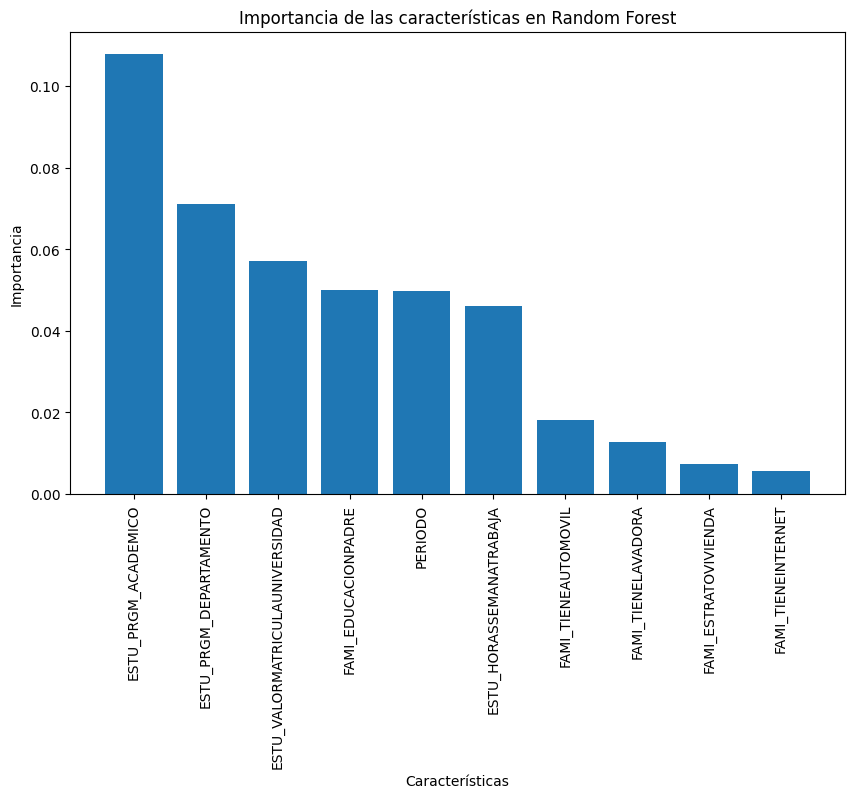

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
importances = rf.feature_importances_[:10]
feature_names = x_train.columns[:10]
indices = np.argsort(importances)[::-1][:10]
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las características en Random Forest')
plt.show()

Ahora hacemos una matriz de confusión que nos permitirá observar las diferentes predicciones que realizó el clasificador.

Primero se realizan predicciones en el conjunto de prueba, luego se calcula la matriz de confusión y finalmente se grafica.

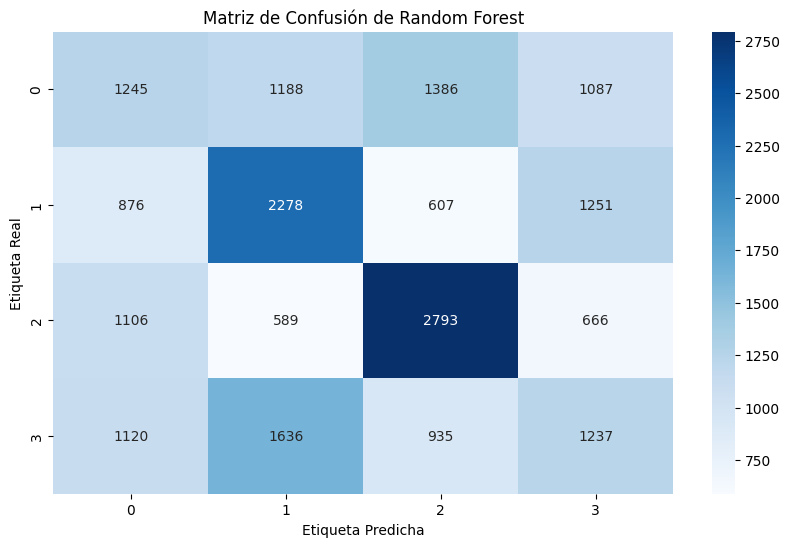

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión de Random Forest')
plt.show()

Se muestra el error de aprendizaje K-NN

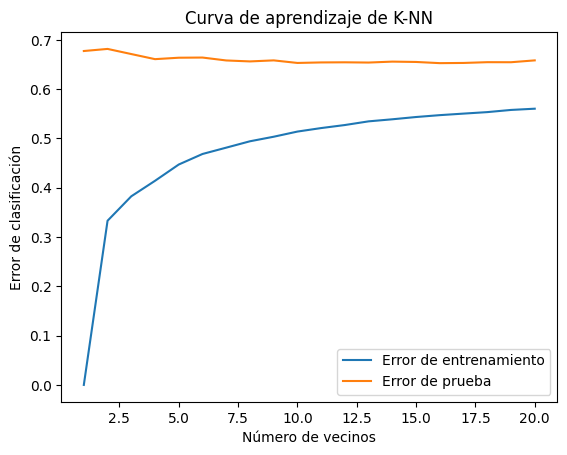

In [ ]:
neighbors = np.arange(1, 21)
train_errors = []
test_errors = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_errors.append(1 - knn.score(x_train, y_train))
    test_errors.append(1 - knn.score(x_test, y_test))
plt.plot(neighbors, train_errors, label='Error de entrenamiento')
plt.plot(neighbors, test_errors, label='Error de prueba')
plt.xlabel('Número de vecinos')
plt.ylabel('Error de clasificación')
plt.title('Curva de aprendizaje de K-NN')
plt.legend()
plt.show()

Se reduce el tamaño de los datos, se definen los 2 algoritmos predictivos y los parámetros a encontrar, se realiza la búsqueda y se imprimen los mejores hiperparámetros de cada algoritmo.

In [ ]:
from sklearn.model_selection import GridSearchCV
x_train, _, y_train, _ = train_test_split(x, y, test_size=0.5, stratify=y, random_state=42)
classifiers = {
    'Random Forest': (RandomForestClassifier(), {
        'n_estimators': [50, 100],
        'max_depth': [3, 5]
    }),
    'Gradient Boosting': (GradientBoostingClassifier(), {
        'n_estimators': [50, 100],
        'learning_rate': [0.1, 0.05]
    })
}
for name, (classifier, param_grid) in classifiers.items():
    grid_search = GridSearchCV(classifier, param_grid, cv=5)
    grid_search.fit(x_train, y_train)
    print(f"Mejores hiperparámetros para {name}:")
    print(grid_search.best_params_)

Mejores hiperparámetros para Random Forest:
{'max_depth': 5, 'n_estimators': 100}
Mejores hiperparámetros para Gradient Boosting:
{'learning_rate': 0.1, 'n_estimators': 100}


El tamaño de los datos se reduce dividiéndolos en conjuntos de entrenamiento y prueba. Luego, se definen los algoritmos predictivos utilizando los mejores hiperparámetros encontrados anteriormente. A continuación, se generan y grafican las curvas de aprendizaje para los dos algoritmos.

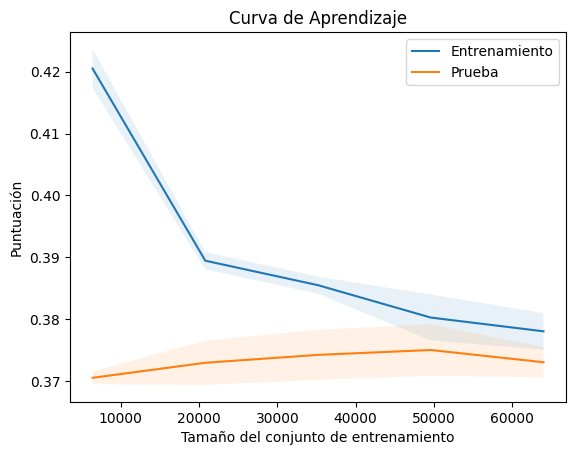

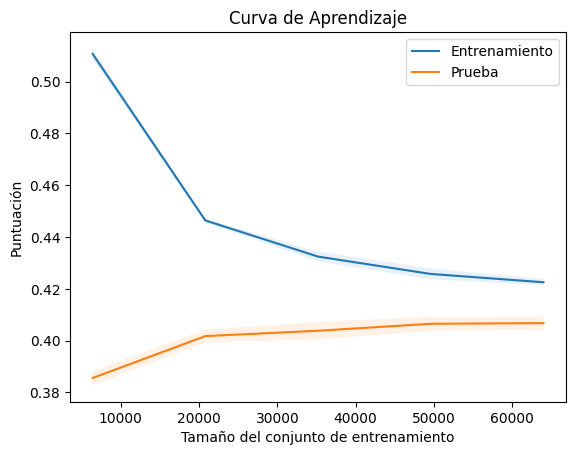

In [ ]:
from sklearn.model_selection import learning_curve
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
classifiers = [
    RandomForestClassifier(n_estimators=100, max_depth=5),
    GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
]
for classifier in classifiers:
    train_sizes, train_scores, test_scores = learning_curve(classifier, x_train, y_train, cv=5, n_jobs=-1)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.figure()
    plt.plot(train_sizes, train_mean, label='Entrenamiento')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.plot(train_sizes, test_mean, label='Prueba')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
    plt.title('Curva de Aprendizaje')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('Puntuación')
    plt.legend(loc='best')
    plt.show()

Hiperparámetros para dos combinaciones de: algoritmo no supervisado + algoritmo predictivo

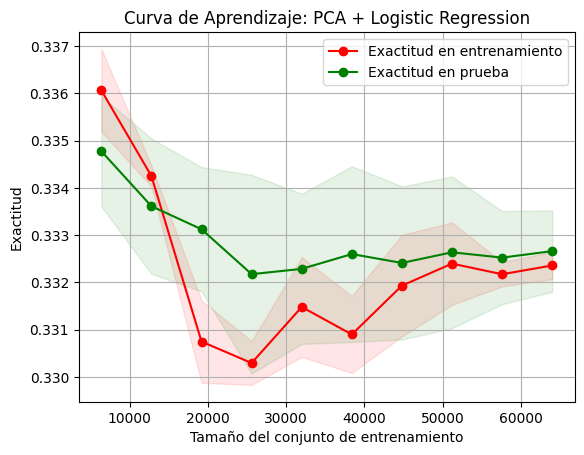

No se detecta overfitting en el modelo.


In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(max_iter=1000))
train_sizes, train_scores, test_scores = learning_curve(
    model, x_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.title('Curva de Aprendizaje: PCA + Logistic Regression')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Exactitud')
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r',
         label='Exactitud en entrenamiento')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
         label='Exactitud en prueba')
plt.legend(loc='best')
plt.show()
diff_scores = train_scores_mean - test_scores_mean
if np.any(diff_scores > 0.1):
    print("Se detecta overfitting en el modelo.")
else:
    print("No se detecta overfitting en el modelo.")

CON EL SIGUEINTE FRAGMENTO DE CÓDIGO SE TOMA DE NUEVO EL ARCHIVO TRAIN Y TEST, SE HACE EL PREPROCESADO MOSTRADO ANTERIORMENTE Y SE PROCEDE A GENERAR UNA PREDICCÓN CON UN MODELO EN ESPECÍFICO: GRADIENTBOOSTING

In [ ]:
# Cargar df_train limpio
df_train = pd.read_csv('/content/data/train.csv')

# Columnas a convertir
columns_to_convert = [
    'ESTU_PRGM_ACADEMICO','ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD',
    'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET',
    'FAMI_EDUCACIONPADRE', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL',
    'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR',
    'FAMI_TIENEINTERNET.1', 'FAMI_EDUCACIONMADRE'
]

# Llena NaN con la moda de cada columna
for col in columns_to_convert:
    mode_val = df_train[col].mode()[0]
    df_train[col] = df_train[col].fillna(mode_val)
    df_test[col] = df_test[col].fillna(mode_val)

# Eliminar columna estudiante privado de la libertad
for df in [df_train, df_test]:
    if "ESTU_PRIVADO_LIBERTAD" in df.columns:
        del df["ESTU_PRIVADO_LIBERTAD"]

# Normalizar texto
df_train['ESTU_PRGM_ACADEMICO'] = df_train['ESTU_PRGM_ACADEMICO'].apply(lambda x: unidecode(str(x)))
df_test['ESTU_PRGM_ACADEMICO'] = df_test['ESTU_PRGM_ACADEMICO'].apply(lambda x: unidecode(str(x)))

# Se importa ordinalEncoder que maneja categorías desconocidas
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
df_train[columns_to_convert] = encoder.fit_transform(df_train[columns_to_convert])
df_test[columns_to_convert] = encoder.transform(df_test[columns_to_convert])

# Se codifica target
y_train_encoded, target_labels = pd.factorize(df_train["RENDIMIENTO_GLOBAL"])

# Entrenar LogisticRegression
X_train = df_train.drop(["ID","RENDIMIENTO_GLOBAL"], axis=1)
y_train = y_train_encoded
X_test = df_test.drop(["ID"], axis=1)

from sklearn.linear_model import LogisticRegression

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Estimación o predicción
y_pred = model.predict(X_test)

# Conversión de predicciones a texto
y_pred_labels = [target_labels[i] for i in y_pred]

# Crear CSV
submission = pd.DataFrame({
    "ID": df_test["ID"],
    "RENDIMIENTO_GLOBAL": y_pred_labels
})
submission.to_csv("submission_final.csv", index=False)

print("✅ Archivo submission_final.csv generado correctamente.")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



✅ Archivo submission_final.csv generado correctamente.
